# Imports

In [1]:
# Basic imports
import sys
import os
import numpy as np
import pandas as pd
# Matplotlib imports
from   matplotlib import pyplot as plt

In [7]:
import importlib

### Add `cachai` to the paths

In [2]:
project_root = os.path.abspath(os.path.join('..', '..'))
sys.path.append(project_root)

In [4]:
from cachai import utilities as util
from cachai import chplot as chp

# Correlation matrix

In [135]:
# Read the .csv as a data frame
df = pd.read_csv('li_correlations.csv')

# Obtain the data of interest
data = df.iloc[:, [i for i in range(1,9)]]

# Correlation matrix
names  = ['[Fe/H]', 'A(Li)', 'Age', 'M', r'T$_{eff}$', 'e', r'Z$_{max}$', r'L$_z$']
colors = ['#9c27b0','#4285f4','#ea4335','#fbbc05','#34a853','#8bc34a','#ff9800','#3949ab']
corr_matrix = data.corr(method='spearman').to_numpy()

In [31]:
corr_matrix

array([[ 1.        , -0.34065038, -0.20892286,  0.29994554, -0.2809563 ,
         0.03323719, -0.21805159, -0.26927295],
       [-0.34065038,  1.        , -0.41704923,  0.40632697,  0.79221308,
        -0.06733031,  0.04632604,  0.09821122],
       [-0.20892286, -0.41704923,  1.        , -0.87667557, -0.55368513,
         0.10171654,  0.11743935,  0.00711886],
       [ 0.29994554,  0.40632697, -0.87667557,  1.        ,  0.55712487,
        -0.01455239,  0.02082047, -0.1344264 ],
       [-0.2809563 ,  0.79221308, -0.55368513,  0.55712487,  1.        ,
        -0.0522437 ,  0.07004073,  0.09978811],
       [ 0.03323719, -0.06733031,  0.10171654, -0.01455239, -0.0522437 ,
         1.        ,  0.19943262, -0.33051181],
       [-0.21805159,  0.04632604,  0.11743935,  0.02082047,  0.07004073,
         0.19943262,  1.        ,  0.09131998],
       [-0.26927295,  0.09821122,  0.00711886, -0.1344264 ,  0.09978811,
        -0.33051181,  0.09131998,  1.        ]])

# Chord Diagram

In [146]:
importlib.reload(util)
importlib.reload(chp)
pass

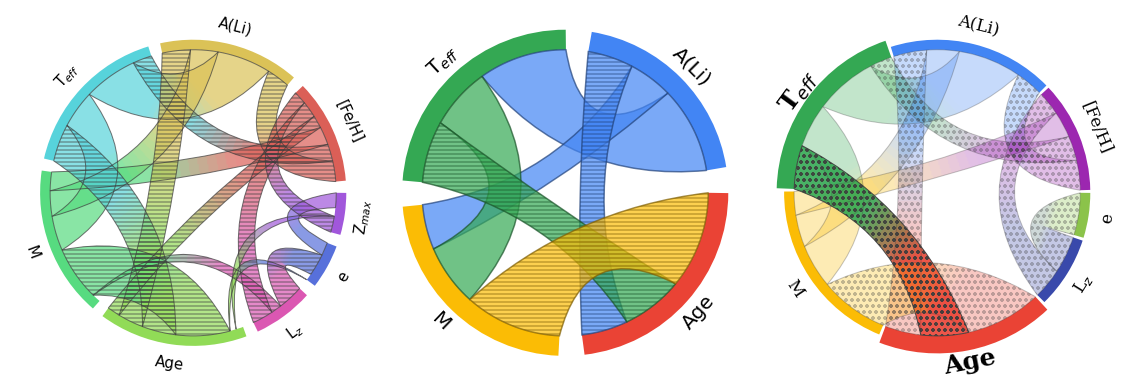

In [144]:
fig, ax = plt.subplots(1,3,figsize=(20,7),facecolor='w')

chp.ChordDiagram(corr_matrix,
                 ax=ax[0],
                 names=names,
                 rasterized=True)

chp.ChordDiagram(corr_matrix,
                 ax=ax[1],
                 names=names,
                 colors=colors,
                 blend=False,
                 threshold=0.4,
                 max_rho_radius=0.5,
                 node_linewidth=20,
                 chord_linewidth=1.5,
                 node_labelpad=0.25,
                 fontsize=20,
                 rasterized=True)

chord_plot = chp.ChordDiagram(corr_matrix,
                 ax=ax[2],
                 names=names,
                 threshold=0.25,
                 colors=colors,
                 node_gap=0.02,        
                 chord_alpha=0.3,
                 negative_hatch='oo',
                 fontdict={'family':'serif','size':17},
                 rasterized=True)

for n in [2,4]:
    chord_plot.node_labels[n].set_fontweight('bold')
    chord_plot.node_labels[n].set_fontsize(25)
    chord_plot.node_patches[n].set_linewidth(35)
chord_plot.chord_patches[2][-1].set_alpha(0.9)
chord_plot.chord_blends[2][-1].set_alpha(0.9)

lim = 1.3
for axi in ax:   
    axi.set_xlim(-lim,lim)
    axi.set_ylim(-lim,lim)
    axi.axis('off')
    axi.set_aspect('equal')

plt.subplots_adjust(wspace=0)

util.save_func('ChordDiagram_examples')
plt.show()